 # EDA
 

In [18]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [19]:
df = pd.read_csv('C:\\Users\\04ama\\OneDrive\\chemistry\\ADHD_SEX_Prediction\\data\\preprocessed data\\processed_data.csv')
solutions = pd.read_excel("C:\\Users\\04ama\\Downloads\\TRAINING_SOLUTIONS (1).xlsx")
df = df.merge(solutions, on='participant_id', how='left')
solutions.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1213 entries, 0 to 1212
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   participant_id  1213 non-null   object
 1   ADHD_Outcome    1213 non-null   int64 
 2   Sex_F           1213 non-null   int64 
dtypes: int64(2), object(1)
memory usage: 28.6+ KB


In [20]:
df.columns


Index(['participant_id', 'EHQ_EHQ_Total', 'ColorVision_CV_Score',
       'APQ_P_APQ_P_CP', 'APQ_P_APQ_P_ID', 'APQ_P_APQ_P_INV',
       'APQ_P_APQ_P_OPD', 'APQ_P_APQ_P_PM', 'APQ_P_APQ_P_PP',
       'SDQ_SDQ_Conduct_Problems',
       ...
       'conn_pca_3', 'conn_pca_4', 'conn_pca_5', 'conn_pca_6', 'conn_pca_7',
       'conn_pca_8', 'conn_pca_9', 'conn_pca_10', 'ADHD_Outcome', 'Sex_F'],
      dtype='object', length=192)

In [21]:
df = df.drop(columns=['Sex_F'], axis =1)

In [22]:
df.head()

participant_id  EHQ_EHQ_Total  ColorVision_CV_Score  APQ_P_APQ_P_CP  \
0   70z8Q2xdTXM3      -0.614994              0.277598       -0.620989   
1   WHWymJu6zNZi      -0.905874              0.277598        2.399904   
2   4PAQp1M6EyAo      -0.659403              0.277598       -0.620989   
3   obEacy4Of68I      -0.074211              0.277598       -0.620989   
4   s7WzzDcmDOhF      -1.736527              0.277598       -0.620989   

   APQ_P_APQ_P_ID  APQ_P_APQ_P_INV  APQ_P_APQ_P_OPD  APQ_P_APQ_P_PM  \
0       -0.093664         0.666958        -0.291162        0.668245   
1        2.421156        -0.776027         1.516001       -0.112023   
2        2.421156         1.491520         0.913613       -0.697224   
3       -0.093664         0.666958         0.913613       -0.112023   
4        0.744610        -1.600589         0.010032       -0.112023   

   APQ_P_APQ_P_PP  SDQ_SDQ_Conduct_Problems  ...  conn_pca_2  conn_pca_3  \
0        1.152066                 -1.030787  ...   -0.365690   -4.918133   
1        0.494192                  0.556449  ...   -3.985258    1.542405   
2        1.152066                  2.937302  ...    0.733000    3.051328   
3       -0.492619                 -1.030787  ...   -2.044630    0.519251   
4       -0.821556                  0.457246  ...   -1.933241    1.834583   

   conn_pca_4  conn_pca_5  conn_pca_6  conn_pca_7  conn_pca_8  conn_pca_9  \
0    3.823590    5.708123   -0.875661   -1.572530   -1.347337    1.700464   
1   -0.105043    0.528662   -2.951531   -0.785672    0.794443    2.779504   
2   -1.763287   -1.932285    6.451779    3.354386    1.942836    1.177159   
3    2.703973    4.443021    2.916705   -1.028009    0.085226    0.127403   
4   -0.383734    0.512349    2.973146   -3.155328    3.416275   -0.226588   

   conn_pca_10  ADHD_Outcome  
0     1.568216             1  
1    -2.400149             1  
2    -2.868644             1  
3     0.521368             1  
4    -3.004009             1  

[5 rows x 191 columns]

In [23]:
df.dtypes

participant_id           object
EHQ_EHQ_Total           float64
ColorVision_CV_Score    float64
APQ_P_APQ_P_CP          float64
APQ_P_APQ_P_ID          float64
                         ...   
conn_pca_7              float64
conn_pca_8              float64
conn_pca_9              float64
conn_pca_10             float64
ADHD_Outcome              int64
Length: 191, dtype: object

In [24]:
#checking for missing values 

df.isnull().sum()   

participant_id          0
EHQ_EHQ_Total           0
ColorVision_CV_Score    0
APQ_P_APQ_P_CP          0
APQ_P_APQ_P_ID          0
                       ..
conn_pca_7              0
conn_pca_8              0
conn_pca_9              0
conn_pca_10             0
ADHD_Outcome            0
Length: 191, dtype: int64

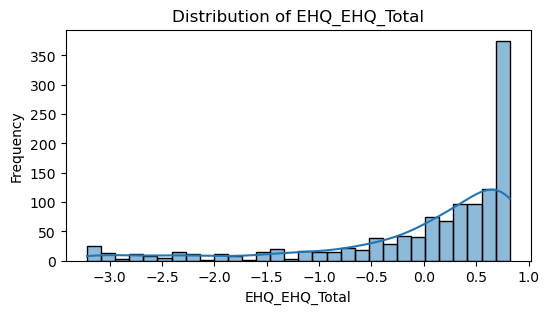

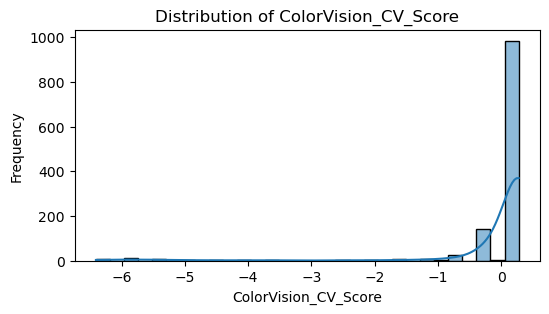

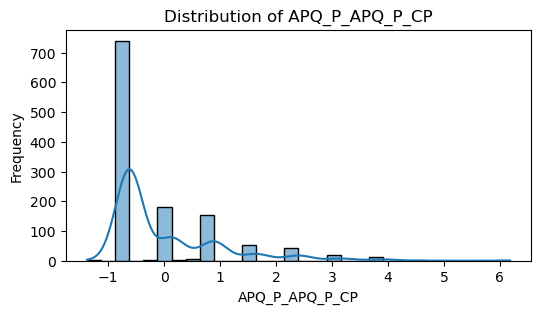

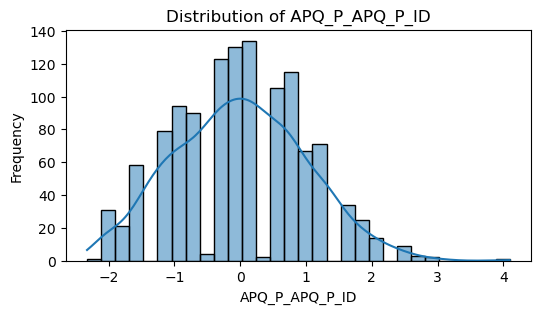

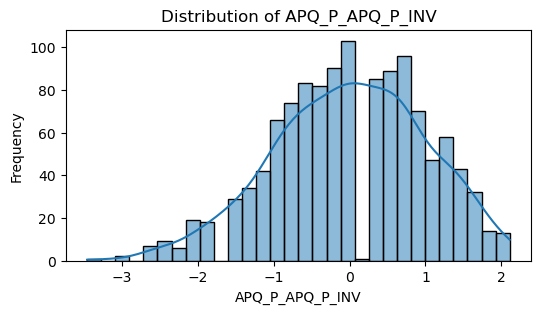

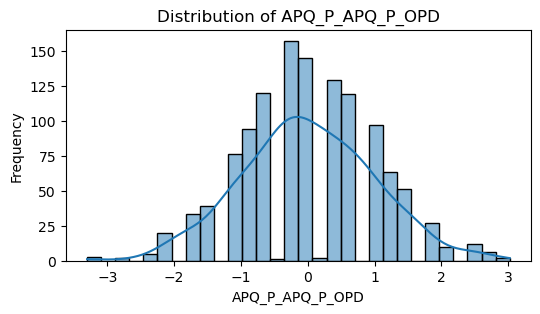

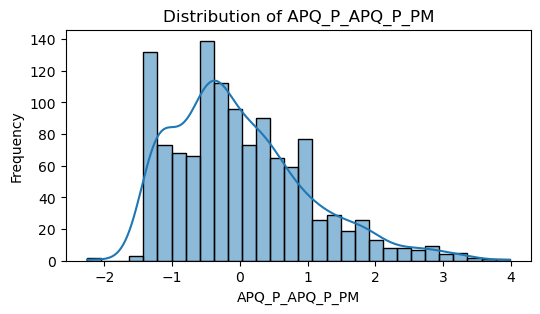

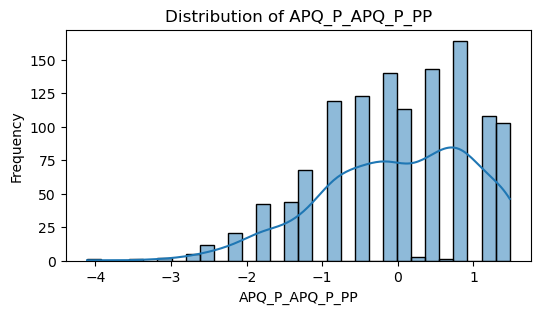

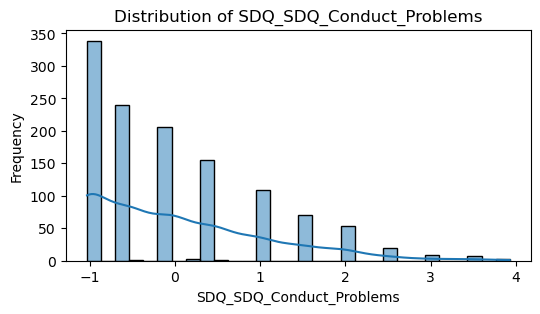

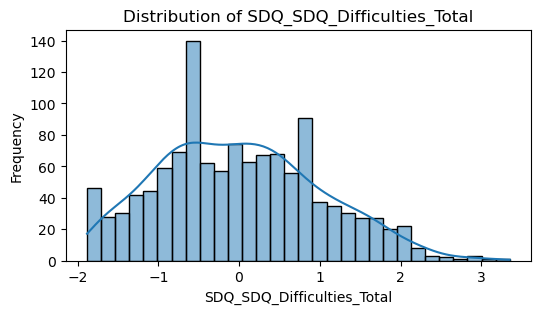

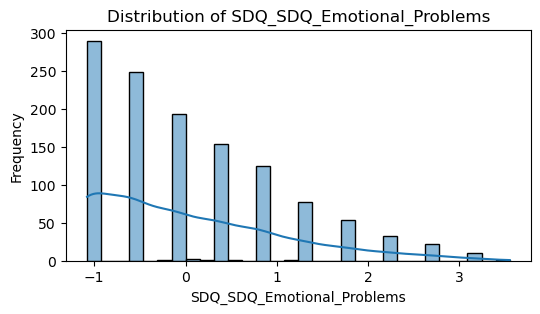

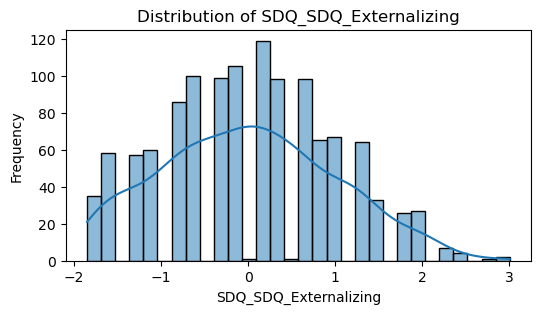

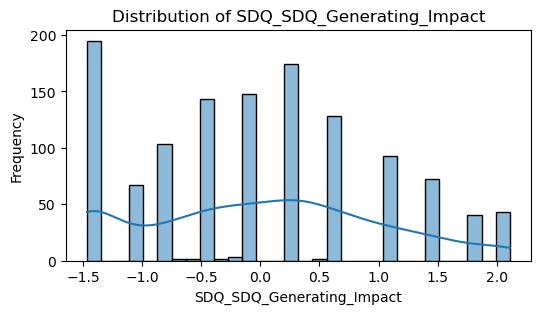

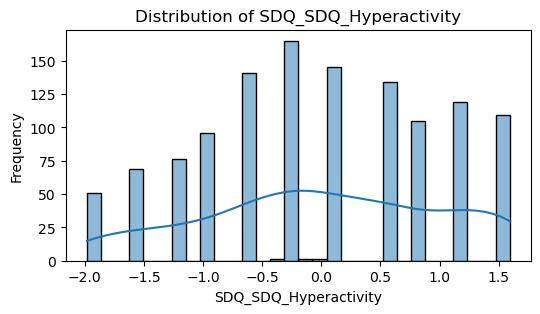

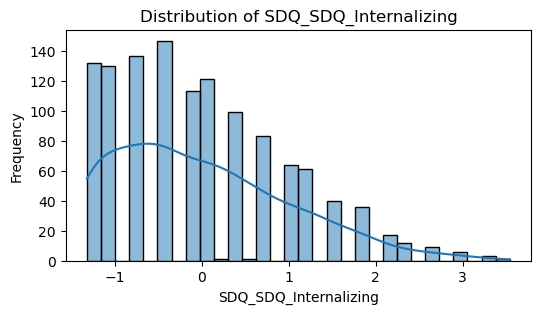

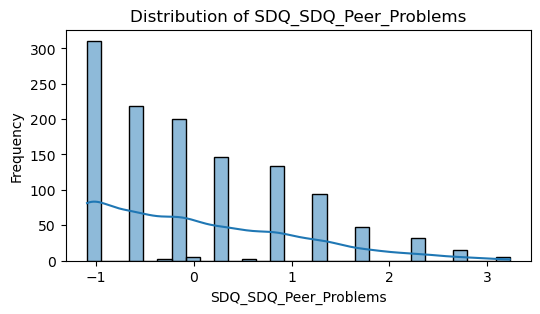

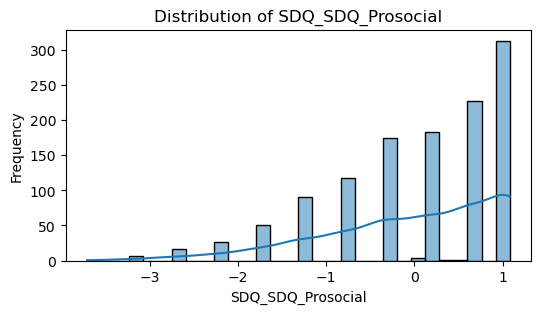

In [25]:
#check data distibutions for quantitative, categorical and connectome features
for col in df.columns[1:18]:  # example for columns 1 to 17
    plt.figure(figsize=(6, 3))
    sns.histplot(df[col], bins=30, kde=True)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()


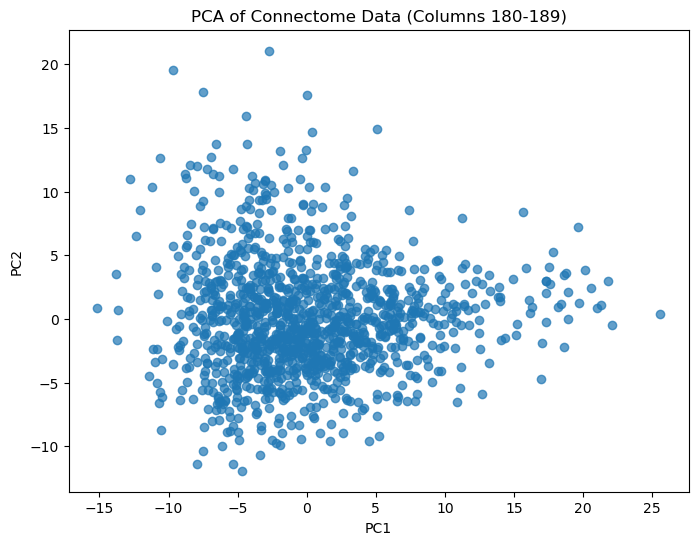

In [26]:
from sklearn.decomposition import PCA
connectome_cols = list(df.columns[180:190])  # columns 180 to 189 (Python indexing is exclusive at the end)
connectome_data = df[connectome_cols]
pca = PCA(n_components=2)
connectome_pca = pca.fit_transform(connectome_data)
plt.figure(figsize=(8, 6))
plt.scatter(connectome_pca[:, 0], connectome_pca[:, 1], alpha=0.7)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('PCA of Connectome Data (Columns 180-189)')
plt.show()

In [27]:
df.to_csv('baseline_dataset.csv', index=False)


# testing baseline model

- logistic regression
- Random Forest 
- SVM 
- XGBoost
- Light GBM

In [28]:
# Baseline Logistic Regression model
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, classification_report
target_col = 'ADHD_Outcome'  # Update if needed
X = df.drop(columns=[target_col, 'participant_id'], axis =1) 
y = df[target_col]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [29]:
lr = LogisticRegression(max_iter=1000)
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)
print('Accuracy:', accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))
cv_scores = cross_val_score(lr, X, y, cv=5)
print('Cross-validated accuracy:', cv_scores.mean())

Accuracy: 0.8024691358024691
              precision    recall  f1-score   support

           0       0.77      0.64      0.70        87
           1       0.82      0.89      0.85       156

    accuracy                           0.80       243
   macro avg       0.79      0.77      0.78       243
weighted avg       0.80      0.80      0.80       243

Cross-validated accuracy: 0.7922831003639084
Cross-validated accuracy: 0.7922831003639084


In [30]:
# Baseline Random Forest model
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
print('Random Forest Accuracy:', accuracy_score(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))
cv_scores_rf = cross_val_score(rf, X, y, cv=5)
print('Random Forest Cross-validated accuracy:', cv_scores_rf.mean())

Random Forest Accuracy: 0.7613168724279835
              precision    recall  f1-score   support

           0       0.72      0.55      0.62        87
           1       0.78      0.88      0.83       156

    accuracy                           0.76       243
   macro avg       0.75      0.71      0.72       243
weighted avg       0.76      0.76      0.75       243

Random Forest Cross-validated accuracy: 0.7914464510424106
Random Forest Cross-validated accuracy: 0.7914464510424106


In [31]:
# Baseline Support Vector Machine (SVM) model
from sklearn.svm import SVC
svm = SVC()
svm.fit(X_train, y_train)
y_pred_svm = svm.predict(X_test)
print('SVM Accuracy:', accuracy_score(y_test, y_pred_svm))
print(classification_report(y_test, y_pred_svm))
cv_scores_svm = cross_val_score(svm, X, y, cv=5)
print('SVM Cross-validated accuracy:', cv_scores_svm.mean())

SVM Accuracy: 0.7489711934156379
              precision    recall  f1-score   support

           0       0.77      0.43      0.55        87
           1       0.74      0.93      0.83       156

    accuracy                           0.75       243
   macro avg       0.76      0.68      0.69       243
weighted avg       0.75      0.75      0.73       243

SVM Cross-validated accuracy: 0.7699588477366255
SVM Cross-validated accuracy: 0.7699588477366255


In [34]:
# Install xgboost if not already installed
%pip install xgboost

  Using cached xgboost-3.0.4-py3-none-win_amd64.whl.metadata (2.1 kB)
Using cached xgboost-3.0.4-py3-none-win_amd64.whl (56.8 MB)
Note: you may need to restart the kernel to use updated packages.


In [43]:
# Baseline XGBoost model
import xgboost as xgb
xgb_model = xgb.XGBClassifier(eval_metric='logloss', random_state=42)
xgb_model.fit(X_train, y_train)
y_pred_xgb = xgb_model.predict(X_test)
print('XGBoost Accuracy:', accuracy_score(y_test, y_pred_xgb))
print(classification_report(y_test, y_pred_xgb))
cv_scores_xgb = cross_val_score(xgb_model, X, y, cv=5)
print('XGBoost Cross-validated accuracy:', cv_scores_xgb.mean())




XGBoost Accuracy: 0.757201646090535
              precision    recall  f1-score   support

           0       0.72      0.53      0.61        87
           1       0.77      0.88      0.82       156

    accuracy                           0.76       243
   macro avg       0.74      0.71      0.72       243
weighted avg       0.75      0.76      0.75       243

XGBoost Cross-validated accuracy: 0.7897935584804272
XGBoost Cross-validated accuracy: 0.7897935584804272


In [37]:
%pip install lightgbm

   ---------------------------------------- 0.0/1.5 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.5 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.5 MB ? eta -:--:--
   ------- -------------------------------- 0.3/1.5 MB ? eta -:--:--
   --------------------- ------------------ 0.8/1.5 MB 1.7 MB/s eta 0:00:01
   ---------------------------- ----------- 1.0/1.5 MB 1.6 MB/s eta 0:00:01
   ------------------------------------ --- 1.3/1.5 MB 1.7 MB/s eta 0:00:01
   ---------------------------------------- 1.5/1.5 MB 1.3 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [42]:
# Baseline LightGBM model
import lightgbm as lgb
lgb_model = lgb.LGBMClassifier(random_state=42, verbose = -1)
lgb_model.fit(X_train, y_train)
y_pred_lgb = lgb_model.predict(X_test)
print('LightGBM Accuracy:', accuracy_score(y_test, y_pred_lgb))
print(classification_report(y_test, y_pred_lgb))
cv_scores_lgb = cross_val_score(lgb_model, X, y, cv=5)
print('LightGBM Cross-validated accuracy:', cv_scores_lgb.mean())

LightGBM Accuracy: 0.7818930041152263
              precision    recall  f1-score   support

           0       0.77      0.56      0.65        87
           1       0.79      0.90      0.84       156

    accuracy                           0.78       243
   macro avg       0.78      0.73      0.75       243
weighted avg       0.78      0.78      0.77       243

LightGBM Cross-validated accuracy: 0.7864979763969663
LightGBM Cross-validated accuracy: 0.7864979763969663
